In [20]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
data = load_wine()
data=load_wine()
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [22]:
data = load_wine()
X = data.data
y = data.target

In [23]:
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [25]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

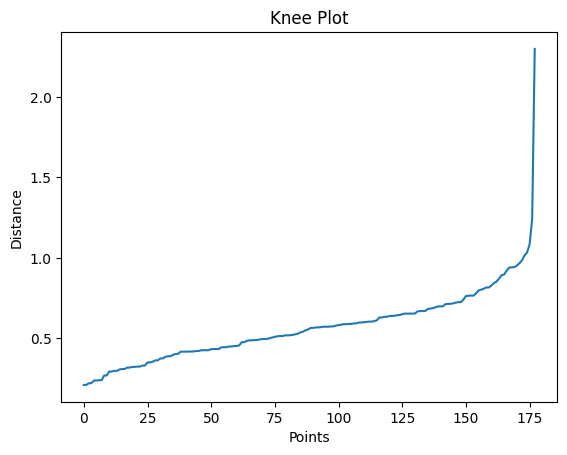

In [26]:
def plot_knee(X_scaled, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X_scaled)
    distances, indices = nbrs.kneighbors(X_scaled)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel('Distance')
    plt.title('Knee Plot')
    plt.show()

plot_knee(X_scaled)


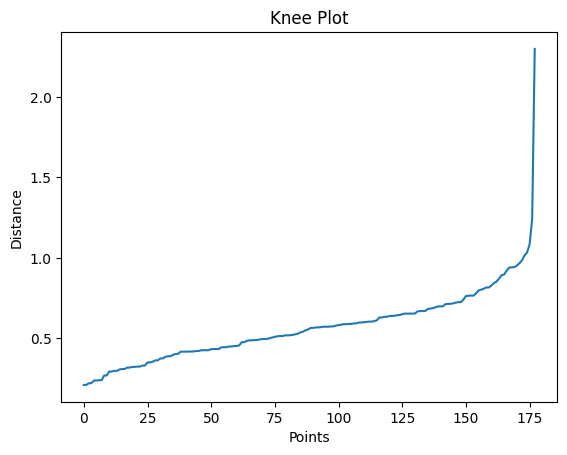

In [27]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('Knee Plot')
plt.show()


In [28]:
knee_index = np.argmax(np.gradient(distances))
optimal_epsilon = distances[knee_index]
print("Optimal Epsilon:", optimal_epsilon)

Optimal Epsilon: 2.297668101037573


In [29]:
optimal_min_points = 5 + 1
print("Optimal Minimum Points:", optimal_min_points)

Optimal Minimum Points: 6
